In [1]:
import tensorflow as tf
from sklearn import datasets
import numpy as np
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [2]:
breast_cancer=datasets.load_breast_cancer()
X=breast_cancer.data
Y=breast_cancer.target
print(X.shape,Y.shape)

(569, 30) (569,)


In [3]:
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
X = mm_scaler.fit_transform(X)
print(X)

[[0.52103744 0.0226581  0.54598853 ... 0.91202749 0.59846245 0.41886396]
 [0.64314449 0.27257355 0.61578329 ... 0.63917526 0.23358959 0.22287813]
 [0.60149557 0.3902604  0.59574321 ... 0.83505155 0.40370589 0.21343303]
 ...
 [0.45525108 0.62123774 0.44578813 ... 0.48728522 0.12872068 0.1519087 ]
 [0.64456434 0.66351031 0.66553797 ... 0.91065292 0.49714173 0.45231536]
 [0.03686876 0.50152181 0.02853984 ... 0.         0.25744136 0.10068215]]


In [4]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,stratify=Y,random_state=4,test_size=0.20)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(455, 30) (114, 30) (455,) (114,)


In [6]:
Y_train=np.reshape(Y_train,(455,1))
Y_test=np.reshape(Y_test,(114,1))
print(Y_train.shape,Y_test.shape)

(455, 1) (114, 1)


In [47]:
model=tf.keras.Sequential([
    layers.Dense(50,activation='relu'),
    layers.Dense(100,activation='relu'),
    layers.Dense(50,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

In [48]:
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=['accuracy'])

In [49]:
history=model.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test))

Epoch 1/100
15/15 [==============================] - 0s 10ms/step - loss: 0.4009 - accuracy: 0.8396 - val_loss: 0.4563 - val_accuracy: 0.8070
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 0.2896 - accuracy: 0.8835 - val_loss: 0.1490 - val_accuracy: 0.9474
Epoch 3/100
15/15 [==============================] - 0s 4ms/step - loss: 0.1634 - accuracy: 0.9275 - val_loss: 0.0676 - val_accuracy: 0.9737
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 0.1016 - accuracy: 0.9626 - val_loss: 0.0503 - val_accuracy: 0.9737
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0879 - accuracy: 0.9692 - val_loss: 0.0747 - val_accuracy: 0.9737
Epoch 6/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0910 - accuracy: 0.9538 - val_loss: 0.0879 - val_accuracy: 0.9649
Epoch 7/100
15/15 [==============================] - 0s 5ms/step - loss: 0.1192 - accuracy: 0.9407 - val_loss: 0.1776 - val_accuracy: 0.9386
Epoch 8/100


In [50]:
model=tf.keras.Sequential([
    layers.Dense(50,activation='relu'),
    layers.Dense(100,activation='relu'),
    layers.Dense(50,activation='relu'),
    layers.Dense(2,activation='softmax')
])

In [51]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=['accuracy'])

In [52]:
history=model.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test))

Epoch 1/100
15/15 [==============================] - 0s 9ms/step - loss: 0.3944 - accuracy: 0.8593 - val_loss: 0.1263 - val_accuracy: 0.9386
Epoch 2/100
15/15 [==============================] - 0s 4ms/step - loss: 0.1842 - accuracy: 0.9209 - val_loss: 0.0697 - val_accuracy: 0.9825
Epoch 3/100
15/15 [==============================] - 0s 4ms/step - loss: 0.1007 - accuracy: 0.9648 - val_loss: 0.0580 - val_accuracy: 0.9825
Epoch 4/100
15/15 [==============================] - 0s 4ms/step - loss: 0.1297 - accuracy: 0.9516 - val_loss: 0.1203 - val_accuracy: 0.9474
Epoch 5/100
15/15 [==============================] - 0s 4ms/step - loss: 0.1030 - accuracy: 0.9670 - val_loss: 0.0562 - val_accuracy: 0.9825
Epoch 6/100
15/15 [==============================] - 0s 4ms/step - loss: 0.1280 - accuracy: 0.9429 - val_loss: 0.0653 - val_accuracy: 0.9737
Epoch 7/100
15/15 [==============================] - 0s 16ms/step - loss: 0.0845 - accuracy: 0.9736 - val_loss: 0.1325 - val_accuracy: 0.9561
Epoch 8/100


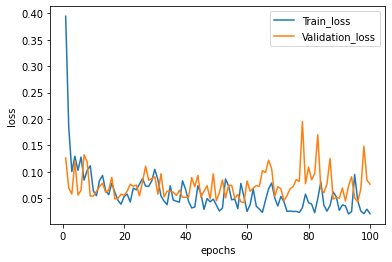

In [53]:
import matplotlib.pyplot as plt

epochs=len(history.history['loss'])
plt.plot([i for i in range(1,epochs+1)],history.history['loss'],label="Train_loss")
plt.plot([i for i in range(1,epochs+1)],history.history['val_loss'],label="Validation_loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

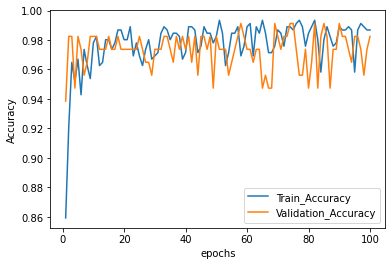

In [54]:
plt.plot([i for i in range(1,epochs+1)],history.history['accuracy'],label="Train_Accuracy")
plt.plot([i for i in range(1,epochs+1)],history.history['val_accuracy'],label="Validation_Accuracy")
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()